Simple Neural Network

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

data_combined = {
    "P2 Shopping Gallery": [5606, 6981, 7590, 7975, 6495, 6637, 6637, 4568, 6009, 6902, 5593, 4915, 4429, 4765, 7167, 7263, 7470, 6476, 5267, 3423, 5670, 5824, 4845, 4845, 5270, 5857, 7594, 6902, 7707],
    "P10 Shopping Gallery": [6240, 7322, 8416, 7639, 5848, 5886, 5886, 4694, 6149, 7102, 5925, 5194, 7365, 11260, 15286, 16239, 16469, 14010, 10301, 8270, 12587, 12876, 11272, 10567, 11743, 12330, 14577, 13980, 16939],
    "Hospital-1": [0, 0, 0, 6329, 24543, 18429, 18429, 15822, 22795, 23686, 21234, 19991, 13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768, 16740, 30080, 27120, 25200, 26480],
    "Tower 1": [11342, 14562, 16511, 16024, 13508, 12785, 12785, 9205, 13074, 13515, 12221, 11216, 11297, 13077, 14780, 15680, 15040, 13160, 10820, 7920, 12020, 12387, 9580, 9580, 10080, 12120, 15500, 14220, 16040],
    "Tower 2": [6217, 13976, 15332, 15362, 13406, 12607, 12607, 9005, 12491, 12414, 11078, 10072, 10135, 11770, 13620, 14860, 14120, 12320, 10540, 7960, 11440, 11658, 9960, 9960, 5140, 11840, 15680, 14460, 15900]
}

def create_dataset(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X_p2, y_p2 = create_dataset(data_combined["Tower 2"], window_size=3)

scaler_X = MinMaxScaler()
X_p2_scaled = scaler_X.fit_transform(X_p2)

y_p2 = y_p2.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_p2_scaled = scaler_y.fit_transform(y_p2)

X_train, X_test, y_train, y_test = train_test_split(X_p2_scaled, y_p2_scaled, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

test_loss = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)
y_test_inversed = scaler_y.inverse_transform(y_test)

mape = mean_absolute_percentage_error(y_test_inversed, predictions)

print("Test Loss:", test_loss)
print("Predictions:", predictions)
print("MAPE (Accuracy):", 100 - mape * 100, "%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.5283 - val_loss: 0.4639
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - loss: 0.4463 - val_loss: 0.3963
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 0.3751 - val_loss: 0.3364
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 0.3136 - val_loss: 0.2900
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2634 - val_loss: 0.2551
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.2223 - val_loss: 0.2248
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.1880 - val_loss: 0.2001
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1607 - val_loss: 0.1777
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 0.1379 - val_loss: 0.1569
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.1176 - val_loss: 0.1376
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0996 - val_loss: 0.1208
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0844 - v

LSTM

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Data (same as provided in your example)
data_combined = {
    "P2 Shopping Gallery": [5606, 6981, 7590, 7975, 6495, 6637, 6637, 4568, 6009, 6902, 5593, 4915, 4429, 4765, 7167, 7263, 7470, 6476, 5267, 3423, 5670, 5824, 4845, 4845, 5270, 5857, 7594, 6902, 7707],
    "P10 Shopping Gallery": [6240, 7322, 8416, 7639, 5848, 5886, 5886, 4694, 6149, 7102, 5925, 5194, 7365, 11260, 15286, 16239, 16469, 14010, 10301, 8270, 12587, 12876, 11272, 10567, 11743, 12330, 14577, 13980, 16939],
    "Hospital-1": [0, 0, 0, 6329, 24543, 18429, 18429, 15822, 22795, 23686, 21234, 19991, 13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768, 16740, 30080, 27120, 25200, 26480],
    "Tower 1": [11342, 14562, 16511, 16024, 13508, 12785, 12785, 9205, 13074, 13515, 12221, 11216, 11297, 13077, 14780, 15680, 15040, 13160, 10820, 7920, 12020, 12387, 9580, 9580, 10080, 12120, 15500, 14220, 16040],
    "Tower 2": [6217, 13976, 15332, 15362, 13406, 12607, 12607, 9005, 12491, 12414, 11078, 10072, 10135, 11770, 13620, 14860, 14120, 12320, 10540, 7960, 11440, 11658, 9960, 9960, 5140, 11840, 15680, 14460, 15900]
}

# Preparing the dataset
def create_dataset(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X_p2, y_p2 = create_dataset(data_combined["Tower 2"], window_size=3)

# Scaling data
scaler_X = MinMaxScaler()
X_p2_scaled = scaler_X.fit_transform(X_p2)

y_p2 = y_p2.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_p2_scaled = scaler_y.fit_transform(y_p2)

# Reshaping data for LSTM input
X_p2_scaled = X_p2_scaled.reshape((X_p2_scaled.shape[0], X_p2_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X_p2_scaled, y_p2_scaled, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss = model.evaluate(X_test, y_test)

# Making predictions
predictions = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)

# Display results
print("Test Loss:", test_loss)
print("Predictions:", predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.4402 - val_loss: 0.4256
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.4078 - val_loss: 0.4054
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.3848 - val_loss: 0.3822
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3591 - val_loss: 0.3576
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3315 - val_loss: 0.3324
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3034 - val_loss: 0.3066
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.2746 - val_loss: 0.2804
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2452 - val_loss: 0.2541
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2158 - val_loss: 0.2278
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1864 - val_loss: 0.2020
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1573 - val_loss: 0.1774
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1297 - val

GRU

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Data (same as provided in your example)
data_combined = {
    "P2 Shopping Gallery": [5606, 6981, 7590, 7975, 6495, 6637, 6637, 4568, 6009, 6902, 5593, 4915, 4429, 4765, 7167, 7263, 7470, 6476, 5267, 3423, 5670, 5824, 4845, 4845, 5270, 5857, 7594, 6902, 7707],
    "P10 Shopping Gallery": [6240, 7322, 8416, 7639, 5848, 5886, 5886, 4694, 6149, 7102, 5925, 5194, 7365, 11260, 15286, 16239, 16469, 14010, 10301, 8270, 12587, 12876, 11272, 10567, 11743, 12330, 14577, 13980, 16939],
    "Hospital-1": [0, 0, 0, 6329, 24543, 18429, 18429, 15822, 22795, 23686, 21234, 19991, 13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768, 16740, 30080, 27120, 25200, 26480],
    "Tower 1": [11342, 14562, 16511, 16024, 13508, 12785, 12785, 9205, 13074, 13515, 12221, 11216, 11297, 13077, 14780, 15680, 15040, 13160, 10820, 7920, 12020, 12387, 9580, 9580, 10080, 12120, 15500, 14220, 16040],
    "Tower 2": [6217, 13976, 15332, 15362, 13406, 12607, 12607, 9005, 12491, 12414, 11078, 10072, 10135, 11770, 13620, 14860, 14120, 12320, 10540, 7960, 11440, 11658, 9960, 9960, 5140, 11840, 15680, 14460, 15900]
}

# Preparing the dataset
def create_dataset(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X_p2, y_p2 = create_dataset(data_combined["Tower 2"], window_size=3)

# Scaling data
scaler_X = MinMaxScaler()
X_p2_scaled = scaler_X.fit_transform(X_p2)

y_p2 = y_p2.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_p2_scaled = scaler_y.fit_transform(y_p2)

# Reshaping data for GRU input
X_p2_scaled = X_p2_scaled.reshape((X_p2_scaled.shape[0], X_p2_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X_p2_scaled, y_p2_scaled, test_size=0.2, random_state=42)

# Build GRU model
model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    GRU(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Model evaluation
test_loss = model.evaluate(X_test, y_test)

# Making predictions
predictions = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)

# Display results
print("Test Loss:", test_loss)
print("Predictions:", predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4509 - val_loss: 0.4149
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3990 - val_loss: 0.3740
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3549 - val_loss: 0.3330
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3108 - val_loss: 0.2918
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2665 - val_loss: 0.2506
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2224 - val_loss: 0.2098
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1788 - val_loss: 0.1716
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1382 - val_loss: 0.1378
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1027 - val_loss: 0.1105
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0747 - val_loss: 0.0922
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0570 - val_loss: 0.0849
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0519 - val_los

ARIMA

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Data (same as provided in your example)
data_combined = {
    "P2 Shopping Gallery": [5606, 6981, 7590, 7975, 6495, 6637, 6637, 4568, 6009, 6902, 5593, 4915, 4429, 4765, 7167, 7263, 7470, 6476, 5267, 3423, 5670, 5824, 4845, 4845, 5270, 5857, 7594, 6902, 7707],
    "P10 Shopping Gallery": [6240, 7322, 8416, 7639, 5848, 5886, 5886, 4694, 6149, 7102, 5925, 5194, 7365, 11260, 15286, 16239, 16469, 14010, 10301, 8270, 12587, 12876, 11272, 10567, 11743, 12330, 14577, 13980, 16939],
    "Hospital-1": [0, 0, 0, 6329, 24543, 18429, 18429, 15822, 22795, 23686, 21234, 19991, 13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768, 16740, 30080, 27120, 25200, 26480],
    "Tower 1": [11342, 14562, 16511, 16024, 13508, 12785, 12785, 9205, 13074, 13515, 12221, 11216, 11297, 13077, 14780, 15680, 15040, 13160, 10820, 7920, 12020, 12387, 9580, 9580, 10080, 12120, 15500, 14220, 16040],
    "Tower 2": [6217, 13976, 15332, 15362, 13406, 12607, 12607, 9005, 12491, 12414, 11078, 10072, 10135, 11770, 13620, 14860, 14120, 12320, 10540, 7960, 11440, 11658, 9960, 9960, 5140, 11840, 15680, 14460, 15900]
}

# Selecting data for "Tower 2"
data_tower_2 = data_combined["Tower 2"]

# Splitting data into train and test sets (80-20 split)
train_size = int(len(data_tower_2) * 0.8)
train_data, test_data = data_tower_2[:train_size], data_tower_2[train_size:]

# Building ARIMA model
# ARIMA order (p, d, q) - chosen based on initial observation; can be tuned further
model = ARIMA(train_data, order=(3, 1, 2))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test_data))
test_loss = mean_squared_error(test_data, forecast)

# Displaying results
print("Test Loss (MSE):", test_loss)
print("Predictions:", forecast)
print("Actual values:", test_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test Loss (MSE): 13278681.629766094
Predictions: [ 9569.46629366  9880.09818557 10513.80750319 10947.90730909
 11207.37946862 11175.5937623 ]
Actual values: [9960, 5140, 11840, 15680, 14460, 15900]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA

In [ ]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Data (same as provided in your example)
data_combined = {
    "P2 Shopping Gallery": [5606, 6981, 7590, 7975, 6495, 6637, 6637, 4568, 6009, 6902, 5593, 4915, 4429, 4765, 7167, 7263, 7470, 6476, 5267, 3423, 5670, 5824, 4845, 4845, 5270, 5857, 7594, 6902, 7707],
    "P10 Shopping Gallery": [6240, 7322, 8416, 7639, 5848, 5886, 5886, 4694, 6149, 7102, 5925, 5194, 7365, 11260, 15286, 16239, 16469, 14010, 10301, 8270, 12587, 12876, 11272, 10567, 11743, 12330, 14577, 13980, 16939],
    "Hospital-1": [0, 0, 0, 6329, 24543, 18429, 18429, 15822, 22795, 23686, 21234, 19991, 13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768, 16740, 30080, 27120, 25200, 26480],
    "Tower 1": [11342, 14562, 16511, 16024, 13508, 12785, 12785, 9205, 13074, 13515, 12221, 11216, 11297, 13077, 14780, 15680, 15040, 13160, 10820, 7920, 12020, 12387, 9580, 9580, 10080, 12120, 15500, 14220, 16040],
    "Tower 2": [6217, 13976, 15332, 15362, 13406, 12607, 12607, 9005, 12491, 12414, 11078, 10072, 10135, 11770, 13620, 14860, 14120, 12320, 10540, 7960, 11440, 11658, 9960, 9960, 5140, 11840, 15680, 14460, 15900]
}

# Selecting data for "Tower 2"
data_tower_2 = data_combined["Tower 2"]

# Splitting data into train and test sets (80-20 split)
train_size = int(len(data_tower_2) * 0.8)
train_data, test_data = data_tower_2[:train_size], data_tower_2[train_size:]

# Building SARIMA model
# SARIMA order (p, d, q)(P, D, Q, s) - chosen based on initial observation; can be tuned further
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecasting
forecast = model_fit.forecast(steps=len(test_data))
test_loss = mean_squared_error(test_data, forecast)
#test_loss = model.evaluate(X_test, y_test)

# Displaying results
print("Test Loss (MSE):", test_loss)
print("Predictions:", forecast)
print("Actual values:", test_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Test Loss (MSE): 24762643.35141922
Predictions: [ 8714.03663988 12914.98317056 18464.17474987 19350.76838445
 19427.99460776 18030.2276966 ]
Actual values: [9960, 5140, 11840, 15680, 14460, 15900]


Transformer

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_transformer_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

input_shape = X_train.shape[1:]
head_size = 256
num_heads = 4
ff_dim = 4
num_transformer_blocks = 4
mlp_units = [128]
mlp_dropout = 0.4
dropout = 0.25

model = build_transformer_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout,
    mlp_dropout,
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="mean_squared_error",
)

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
)

test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

predictions = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)
print("Predictions:", predictions)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 0.6659 - val_loss: 0.5428
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6651 - val_loss: 0.5357
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.6662 - val_loss: 0.5286
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.6016 - val_loss: 0.5217
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.6247 - val_loss: 0.5149
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.6182 - val_loss: 0.5082
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.5899 - val_loss: 0.5016
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.6185 - val_loss: 0.4951
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.5928 - val_loss: 0.4887
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.5875 - val_loss: 0.4823
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.6320 - val_loss: 0.4760
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.5960 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
Predictions: [[7914.5225]
 [7850.6675]
 [7954.3335]
 [8131.3135]
 [8163.675 ]
 [8062.241 ]]


In [ ]:
import matplotlib.pyplot as plt

# Replace `tower2_actual` and `tower2_predictions` with the variable names in your notebook
# that hold the actual values and the predictions for Tower 2.
actual_values = tower2_actual  # Replace with actual data variable
predicted_values_model1 = model1_predictions_tower2  # Replace with model 1 predictions variable
predicted_values_model2 = model2_predictions_tower2  # Replace with model 2 predictions variable
# Add more models if applicable

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label="Actual Values", color="black", linewidth=2)
plt.plot(predicted_values_model1, label="Model 1 Predictions", linestyle='--')
plt.plot(predicted_values_model2, label="Model 2 Predictions", linestyle='--')
# Add additional `plt.plot` lines if there are more prediction models

# Customize the plot
plt.title("Comparison of Actual vs Predicted Values for Tower 2")
plt.xlabel("Time")
plt.ylabel("Energy Output")
plt.legend()
plt.grid(True)
plt.show()


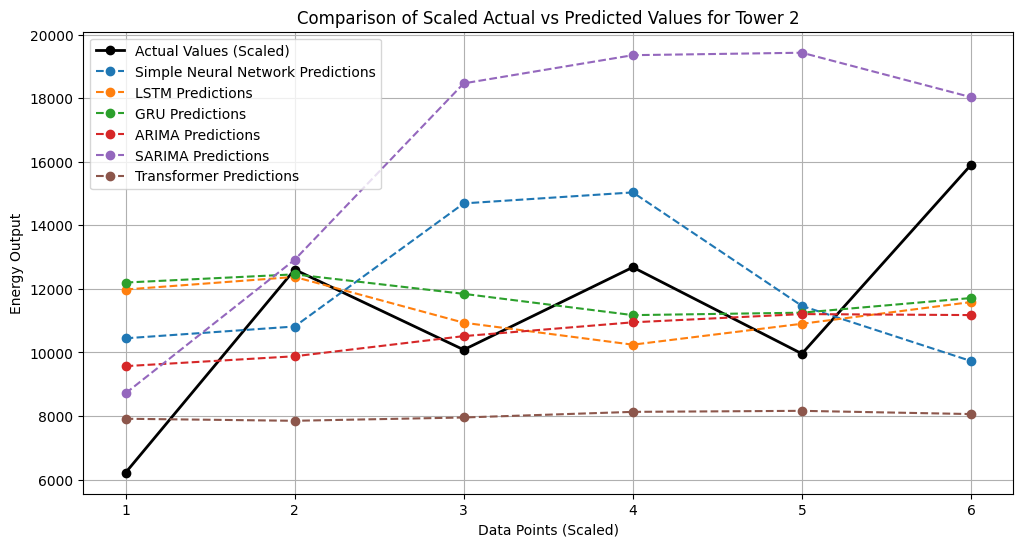

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Full actual values for Tower 2
full_actual_values = [6217, 13976, 15332, 15362, 13406, 12607, 12607, 9005, 12491,
                      12414, 11078, 10072, 10135, 11770, 13620, 14860, 14120, 12320,
                      10540, 7960, 11440, 11658, 9960, 9960, 5140, 11840, 15680, 14460, 15900]

# Scale down to 6 points using interpolation
x_full = np.linspace(0, len(full_actual_values) - 1, num=len(full_actual_values))
x_six = np.linspace(0, len(full_actual_values) - 1, num=6)
interpolator = interp1d(x_full, full_actual_values, kind='linear')
scaled_actual_values = interpolator(x_six)

# Predictions from each model
predictions = {
    "Simple Neural Network": [10445.266, 10816.173, 14688.625, 15034.099, 11464.167, 9730.111],
    "LSTM": [11980.2, 12376.067, 10935.731, 10244.498, 10902.588, 11584.279],
    "GRU": [12199.168, 12456.672, 11843.451, 11174.068, 11251.015, 11711.868],
    "ARIMA": [9569.46629366, 9880.09818557, 10513.80750319, 10947.90730909, 11207.37946862, 11175.5937623],
    "SARIMA": [8714.03663988, 12914.98317056, 18464.17474987, 19350.76838445, 19427.99460776, 18030.2276966],
    "Transformer": [7914.5225, 7850.6675, 7954.3335, 8131.3135, 8163.675, 8062.241]
}

# Plotting
plt.figure(figsize=(12, 6))
x = np.arange(1, 7)  # Six points to match predictions

# Plot scaled actual values
plt.plot(x, scaled_actual_values, label="Actual Values (Scaled)", color="black", linewidth=2, marker='o')

# Plot predictions for each model
for model, values in predictions.items():
    plt.plot(x, values, label=f"{model} Predictions", linestyle='--', marker='o')

# Customize the plot
plt.title("Comparison of Scaled Actual vs Predicted Values for Tower 2")
plt.xlabel("Data Points (Scaled)")
plt.ylabel("Energy Output")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

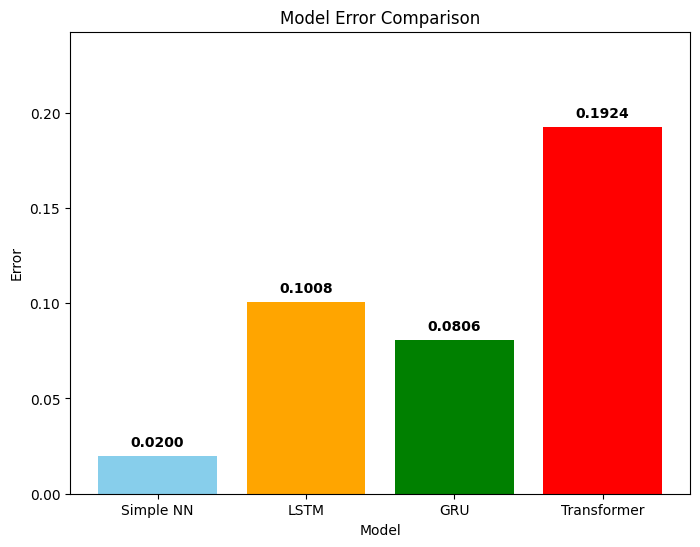

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding error values
models = ['Simple NN', 'LSTM', 'GRU', 'Transformer']
errors = [0.019997578114271164, 0.10075342655181885, 0.08064461499452591, 0.19240951538085938]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, errors, color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Error Comparison')
plt.ylim(0, max(errors) + 0.05)  # Add a little space above the highest bar

# Displaying the error values on top of each bar
for i, v in enumerate(errors):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontweight='bold')

plt.show()
